/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


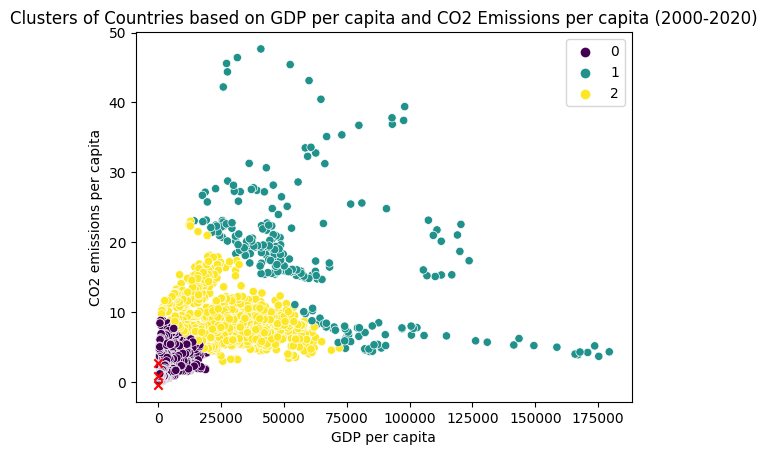

/var/folders/cx/z_1z7md90_g07htdlgjfpqlh0000gn/T/ipykernel_32947/1387740755.py:104: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(xdata, ydata, cmap='viridis', label='Data Points')


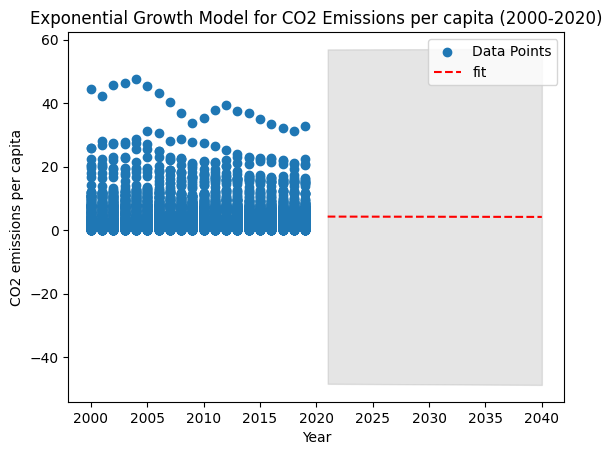

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/cx/z_1z7md90_g07htdlgjfpqlh0000gn/T/ipykernel_32947/1387740755.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_year_data['cluster'] = kmeans.fit_predict(data_scaled)


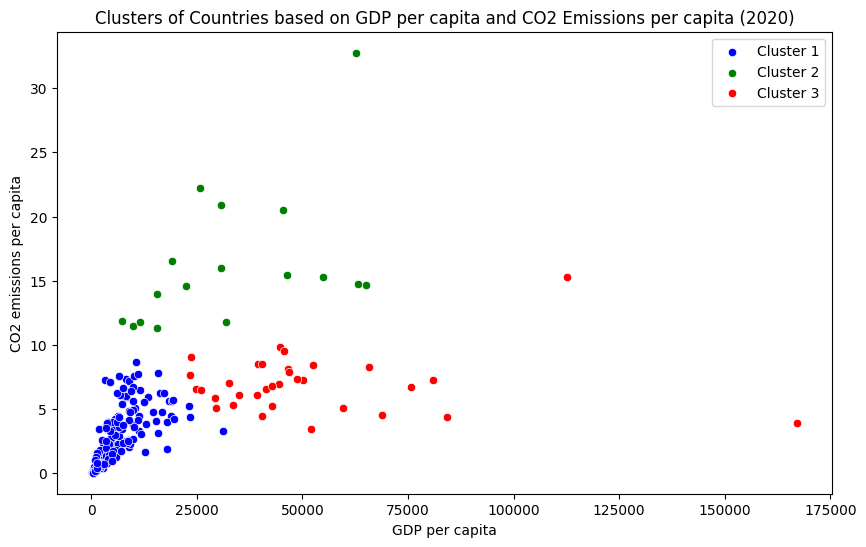


Cluster 1:
                             Country  GDP_per_capita  CO2_emissions
0        Africa Eastern and Southern     1512.270553       0.903764
20        Africa Western and Central     1749.303317       0.485884
40                        Arab World     6384.066321       4.272608
60            Caribbean small states    10429.332040       5.102301
80    Central Europe and the Baltics    16358.474150       6.265422
...                              ...             ...            ...
4572                      Uzbekistan     1784.009816       3.475544
4592                         Vanuatu     3076.589886       0.689873
4627                         Vietnam     3491.091274       3.513276
4666                          Zambia     1268.120941       0.369958
4686                        Zimbabwe     1421.868596       0.765894

[184 rows x 3 columns]

Cluster 2:
                   Country  GDP_per_capita  CO2_emissions
680          North America    63198.701318      14.753530
1118             Aus

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit
import seaborn as sns

from pandas_datareader import wb

# Define the indicators you want to analyze
indicators = {
    'NY.GDP.PCAP.CD': 'GDP_per_capita',  # GDP per capita
    'EN.ATM.CO2E.PC': 'CO2_emissions',   # CO2 emissions per capita
}
# Define the date range
start_date = 2000
end_date = 2020

# Get the data from the World Bank API
data = wb.download(indicator=list(indicators.keys()), country='all', start=start_date, end=end_date)

# Rename columns
data.columns = [indicators[col] for col in data.columns]

# Drop missing values
data = data.dropna()

# Reset index and rename columns
data = data.reset_index().rename(columns={'country': 'Country', 'year': 'Year'})
data['Year'] = data['Year'].astype(int)

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[['GDP_per_capita', 'CO2_emissions']])

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(normalized_data)

# Visualize clustering results
sns.scatterplot(data=data, x='GDP_per_capita', y='CO2_emissions', hue=clusters, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel("GDP per capita")
plt.ylabel("CO2 emissions per capita")
plt.title("Clusters of Countries based on GDP per capita and CO2 Emissions per capita (2000-2020)")
plt.show()

# Define the models you want to fit, e.g., exponential growth, logistic function, low order polynomials
def exponential_growth(x, a, b):
    return a * np.exp(b * x)

def logistic_function(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

def linear_model(x, a, b):
    return a * x + b

def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p, s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   

# Fit the model using curve_fit
xdata = data['Year']
ydata = data['CO2_emissions']
popt, pcov = curve_fit(linear_model, xdata, ydata)

# Use the model for predictions
years = np.arange(2021, 2041)
predictions = linear_model(years, *popt)

# Calculate the lower and upper limits of the confidence range using err_ranges
lower, upper = err_ranges(years, linear_model, popt, np.sqrt(np.diag(pcov)))

# Visualize the model and confidence range
plt.scatter(xdata, ydata, cmap='viridis', label='Data Points')
plt.plot(years, predictions, 'r--', label='fit')
plt.fill_between(years, lower, upper, color='gray', alpha=0.2)
plt.xlabel('Year')
plt.ylabel('CO2 emissions per capita')
plt.title("Exponential Growth Model for CO2 Emissions per capita (2000-2020)")
plt.legend()
plt.show()



# Analyze the results
# Perform the analysis based on the clusters and fitting results
# Compare countries, trends, and any other interesting insights

# Filter the latest year's data for clustering
latest_year_data = data[data['Year'] == data['Year'].max()]

# Normalize the latest year's data
data_scaled = scaler.fit_transform(latest_year_data[['GDP_per_capita', 'CO2_emissions']])

# Perform KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
latest_year_data['cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(n_clusters):
    cluster_data = latest_year_data[latest_year_data['cluster'] == i]
    sns.scatterplot(data=cluster_data, x='GDP_per_capita', y='CO2_emissions', color=colors[i], label=f'Cluster {i+1}')

plt.xlabel('GDP per capita')
plt.ylabel('CO2 emissions per capita')
plt.title("Clusters of Countries based on GDP per capita and CO2 Emissions per capita (2020)")
plt.legend()
plt.show()

# Analyze trends within each cluster
for i in range(n_clusters):
    cluster_data = latest_year_data[latest_year_data['cluster'] == i]
    print(f"\nCluster {i+1}:")
    print(cluster_data[['Country', 'GDP_per_capita', 'CO2_emissions']])